<img align=left src='keras.png'/>

# Keras - sieć do rozpoznawania ubrań

Przyklad oparty na bazie danych Fashion-MNIST czyli zdjęciach z Zalando (60,000 w bazie treningowej i 10,000 testowych).  
Każde zdjęcie to czarno-biały obrazek o rozdzielczości 28x28 oraz numer jednej z 10 klas:  

- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

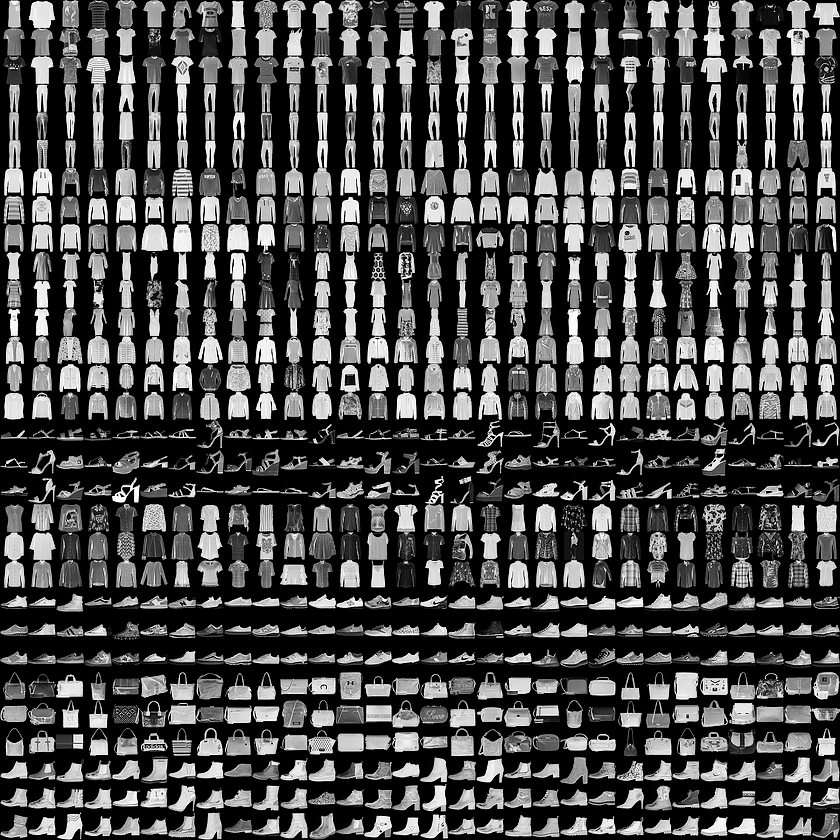

In [3]:
Image('fashion-mnist.png')

## Sieć Neuronowa w Keras
Importujemy niezbędne moduły

In [4]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
import matplotlib.pyplot as plt
%matplotlib inline


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Ładujemy dane: fashion-MNIST

In [5]:
# wgrywamy dane i dzielimy ja na training i test set
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

kategorie = {0:'T-shirt/top', 1: 'Trousers', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 
             5: 'Sandals', 6:'Shirt', 7:'Sneacker', 8:'Bag', 9:'Ankle boot'}

def kategoria(numer):
    return kategorie[numer]
    

In [6]:
train_X.shape

(60000, 28, 28)

Coat


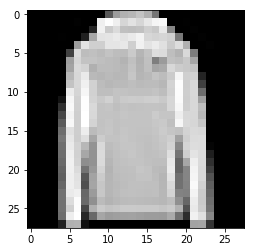

In [7]:
plt.imshow(train_X[24], cmap='gray')
print(kategoria(train_Y[24]))


Text(0.5,1,'Trousers')

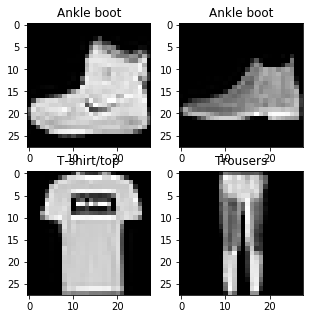

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(221)
plt.imshow(train_X[0], cmap='gray')
plt.title(kategoria(train_Y[0]))

# Display the first image in testing data
plt.subplot(222)
plt.imshow(test_X[0], cmap='gray')
plt.title(kategoria(test_Y[0]))

# Display the first image in testing data
plt.subplot(223)
plt.imshow(train_X[1], cmap='gray')
plt.title(kategoria(train_Y[1]))

# Display the first image in testing data
plt.subplot(224)
plt.imshow(test_X[3], cmap='gray')
plt.title(kategoria(test_Y[3]))

In [9]:
# zmieniamy kształt
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)


# zmieniamy dane pixeli na liczby zmiennoprzecinkowe
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')


# skalujemy wartosci pixeli do zakresu od 0 do 1
train_X = train_X / 255.
test_X = test_X / 255.

print('train_X shape:', train_X.shape)
print(test_X.shape[0], 'test samples')

train_X shape: (60000, 28, 28, 1)
10000 test samples


### Parametru naszego modelu

In [10]:
batch_size = 64 # 128 obrazki w jednym mini-batchu, średnia błędów z batcha jest podstawą do zmiany wag w sieci
num_classes = 10 # ilość klas
epochs = 10 # ilość epok (ile razy trenujemy sieć używając  naszego zestawu danych)

### Zmieniamy odpowiedzi do: one-hot format

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [11]:
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [12]:
for i in range(5):
    print(train_Y[i])

for i in range(5):
    print(train_Y_one_hot[i])
    

9
0
0
3
0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Przykładowa zdjęcie

In [13]:
print('Original label:', train_Y[24])
print('After conversion to one-hot:', train_Y_one_hot[24])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [14]:
train_X[24].shape

(28, 28, 1)

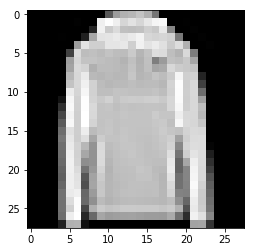

In [15]:
plt.imshow(train_X[24].reshape(28,28), cmap='gray')

In [16]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

## Definiujemy nasz model

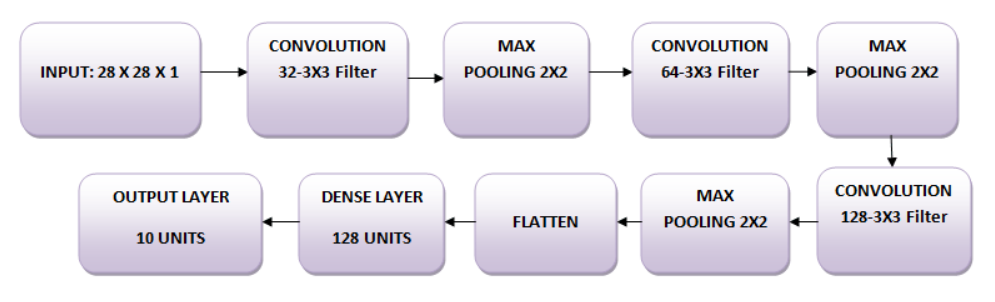

In [17]:
Image('fashion-MNIST_net.png')

In [18]:
fashion_model = Sequential()
# Kernel (filtr) o rozmiarze (3, 3) Funkcja aktywacyjna, w tym wypadku LeakyReLU
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))# Dziękifunkcji  "softmax" odpowiedzi są w zakresie [0-1] i sumują się do 1
                                                   # czyli mogą być traktowane jako prawdopodobieństwo

## Kompilujemy nasz model
Nasz model zbudowany w Pythonie jest  optymalizowany i kompilowany do kodu maszynowego. 

Do skompilowania naszego modelu Keras potrzebuje również **loss function** i **optimizera**. 
Nasz **loss function** to *categorical crossentropy*, która dobrze nadaje sie do porównywania dwóch rozkładów prawdopodobieństwa.

Odpowiedż naszej sieci to prawdopodobieństwo, ze dana cyfra to któraś z 10 cyfr (np. "na 80% ten obrazek to cyfra '3', na 10% to '8', na 5% to '2', itd"), a targetem jest dystrybucja w której prawidlłowa odpowiedż ma 100% prawdopodobieństwa, a wszystkie inne odpowiedzi 0%.Cross-entropy jest miarą różnicy pomiędzy naszą dystrybucją prawdopodobieństwa, a prawidłową  
[Szczegóły na Wikipedii](https://en.wikipedia.org/wiki/Cross_entropy)

Optimizer decyduje, jak szybko model się uczy i zapobiega jego zatrzymaniu.  
Korzystamy z ['adama'](http://ruder.io/optimizing-gradient-descent/index.html#adam)

In [19]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, 
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])




In [20]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

## Trenujemy naszą sieć!

In [21]:
fashion_train = fashion_model.fit(train_X, train_label, 
                                  batch_size=batch_size,
                                  epochs=10,
                                  verbose=1,
                                  validation_data=(valid_X, valid_label))



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 290s 6ms/step - loss: 0.4675 - acc: 0.8285 - val_loss: 0.3269 - val_acc: 0.8834
Epoch 2/10
48000/48000 [==============================] - 301s 6ms/step - loss: 0.2878 - acc: 0.8945 - val_loss: 0.2878 - val_acc: 0.8947
Epoch 3/10
48000/48000 [==============================] - 292s 6ms/step - loss: 0.2408 - acc: 0.9124 - val_loss: 0.2548 - val_acc: 0.9071
Epoch 4/10
48000/48000 [==============================] - 307s 6ms/step - loss: 0.2089 - acc: 0.9239 - val_loss: 0.2402 - val_acc: 0.9143
Epoch 5/10
48000/48000 [==============================] - 279s 6ms/step - loss: 0.1817 - acc: 0.9330 - val_loss: 0.2415 - val_acc: 0.9145
Epoch 6/10
48000/48000 [==============================] - 291s 6ms/step - loss: 0.1575 - acc: 0.9411 - val_loss: 0.2370 - val_acc: 0.9175
Epoch 7/10
48000/48000 [==============================] - 300s 6ms/step - loss: 0.1363 - acc: 0.9486 - val_loss: 0.2571 - 

### Zapisujemy naszą wytrenowaną sieć

In [22]:
fashion_model.save('fashion_mnist_cnn.h5')

## Sprawdzamy, czy nasza sieć działa

In [23]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 19s 2ms/step


In [24]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2895976121991873
Test accuracy: 0.9155


### Sprawdzamy czy sieć się czegoś nauczyła

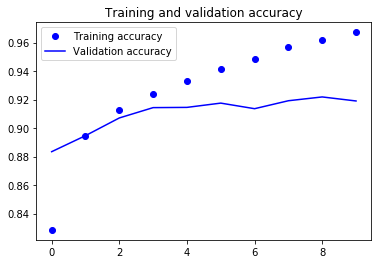

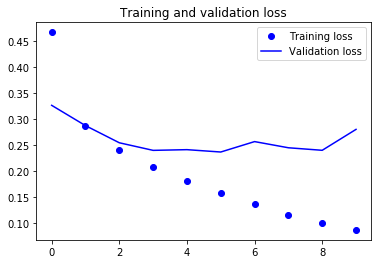

In [25]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
from keras.preprocessing import image
def prepare_img(picture_path):
    img = image.load_img(path=picture_path,grayscale=True,target_size=(28,28))
    img = 255 - image.img_to_array(img)
    test_img = img.reshape((1,28,28,1))
    return test_img

prepare_img('fashion-mnist.png')

ImportError: Could not import PIL.Image. The use of `array_to_img` requires PIL.

## Model + regularization (dropout)

In [60]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

odpowiedz sieci zwraca one-hot encoding: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
odpowiedz sieci to: 9


In [ ]:
fashion_model.summary()

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))